
<div style="text-align: right; direction: rtl;">
در این چالش قصد داریم با توجه به یک جفت تصویر از یک صفحه شطرنج،
 تشخیص دهیم چه حرکتی مابین این دو وضعیت از صفحه انجام شده است.
  برای مثال با بررسی دو صفحه زیر می‌توانیم تشخصی دهیم حرکت ... 1.
   Nd5 (اسب به خانه d5) انجام شده است.
</div>

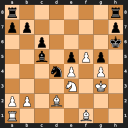                 

تصویر صفحه پیش از حرکت



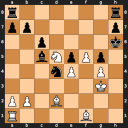

تصویر بعد از حرکت

In [1]:
import Model
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from PIL import Image
from torchtext.vocab import build_vocab_from_iterator
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torch.nn as nn
# Our libraries
from train import train_model
from model_utils import *
from predict_utils import *
from vis_utils import *


In [2]:
import cv2
import numpy as np

def apply_median_filter(image, kernel_size):
    median_filtered_image = cv2.medianBlur(np.array(image), kernel_size)
    return Image.fromarray(median_filtered_image)


In [3]:
from torchvision.transforms import transforms, Lambda
dataset=Model.ChessDataset
dataset1=Model.ChessDataset1
dataset2=Model.ChessDataset2
dataset3=Model.ChessDataset3
dataset4=Model.ChessDataset4
dataset5=Model.ChessDataset5
dataset6=Model.ChessDataset6
transform = transforms.Compose(
    [transforms.Resize((128, 128)),
     Lambda(lambda x: apply_median_filter(x, 3)),
     transforms.ColorJitter(.2,.2,.1),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ],
     )

transformT = transforms.Compose(
    [transforms.Resize((128, 128)),
    Lambda(lambda x: apply_median_filter(x, 3)),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ],
     )

In [4]:
train_dataset = dataset(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=25, shuffle=True)
#valid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_pieces =Model.ChessModel(7)

train_dataset1 = dataset1(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset1(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader1 = DataLoader(train_dataset1, batch_size=25, shuffle=True)
#valid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_Cul =Model.ChessModel(73)

train_dataset2 = dataset2(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset2(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader2 = DataLoader(train_dataset2, batch_size=25, shuffle=True)
#valid_dataset2 = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_x =Model.ChessModel(2)

train_dataset3 = dataset3(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset3(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader3 = DataLoader(train_dataset3, batch_size=25, shuffle=True)
#valid_dataset3 = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_s =Model.ChessModel(9)

train_dataset4 = dataset4(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset4(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader4 = DataLoader(train_dataset4, batch_size=25, shuffle=True)
#alid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_o=Model.SimpleCNN(4)

train_dataset5 = dataset5(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset4(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader5 = DataLoader(train_dataset5, batch_size=20, shuffle=True)
#alid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
# model_M=Model.SimpleCNN(2)
model_M=Model.ChessModel(2)

train_dataset6 = dataset6(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset4(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader6 = DataLoader(train_dataset6, batch_size=16, shuffle=True)
#alid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
# model_M=Model.SimpleCNN(2)
model_T=Model.ChessModel(2)


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
model_Cul = model_Cul.to(device)
model_x = model_x.to(device)
model_s = model_s.to(device)
model_o = model_o.to(device)
model_pieces = model_pieces.to(device)
model_M = model_M.to(device)
model_T=model_T.to(device)

In [7]:
train_dataset5 = Model.ChessDatasetTest( root_dir="D:\\Problem04\\test", transform=transformT)
test_dataset = DataLoader(train_dataset5, batch_size=16, shuffle=False)

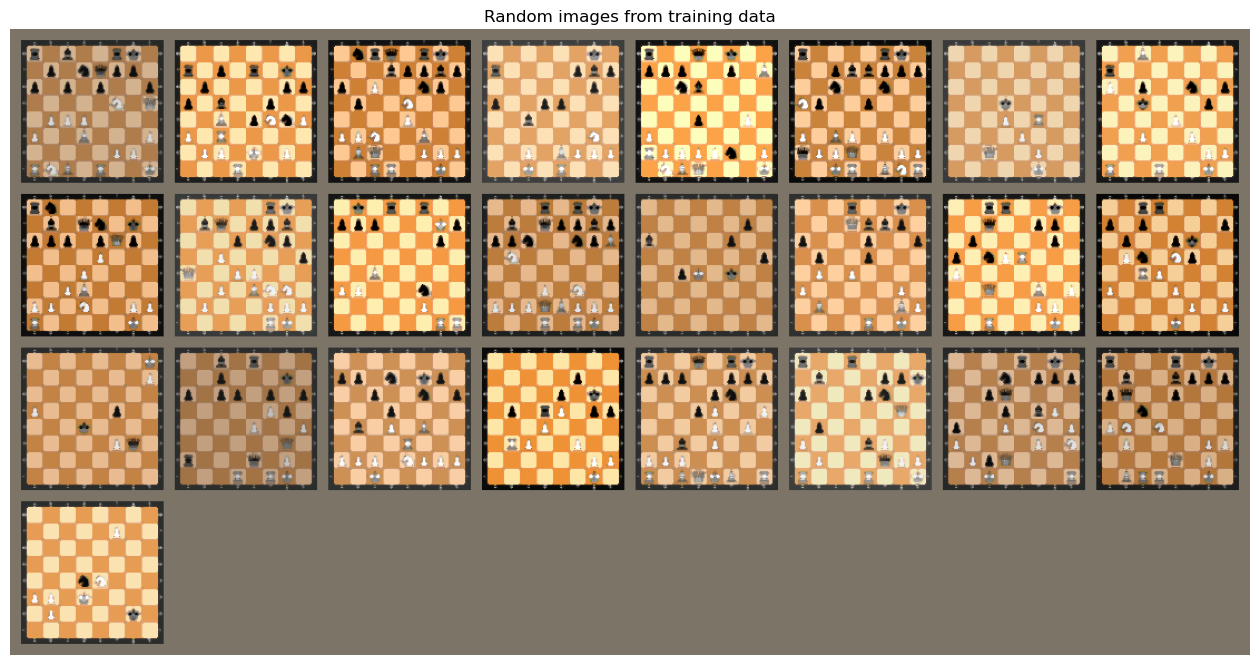

In [8]:
inputs,u, targets = next(iter(train_loader4))

import torchvision

out = torchvision.utils.make_grid(inputs, padding=10)


plt.figure(figsize=(16, 12))
imshow(out, title='Random images from training data')
plt.show()

In [9]:
class_pieces=['K','R','N','Q','B','C','']
Cul_names=[ 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah','a', 'b', 'ba', 'bb', 'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'c', 
            'ca', 'cb', 'cc','cd', 'ce', 'cf', 'cg', 'ch', 'd', 'da', 'db', 'dc', 'dd','de', 'df', 'dg', 'dh', 
            'e', 'ea', 'eb', 'ec', 'ed', 'ee','ef', 'eg', 'eh', 'f', 'fa', 'fb', 'fc', 'fd', 'fe', 'f','fg', 'fh', 'g', 'ga', 'gb',
            'gc', 'gd', 'ge', 'gf','gg' ,'gh', 'h', 'ha', 'hb', 'hc', 'hd', 'he', 'hf', 'hg','hh','']

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pieces.parameters(), lr=0.002, momentum=0.9)
optimizer = optim.SGD(model_T.parameters(), lr=0.002, momentum=0.9)
Model.train(train_loader6,optimizer,model_T ,criterion)


Epoch [1/15], Step [100/1154], Loss: 0.1230
Epoch [1/15], Step [200/1154], Loss: 0.4317
Epoch [1/15], Step [300/1154], Loss: 0.2506
Epoch [1/15], Step [400/1154], Loss: 0.4316
Epoch [1/15], Step [500/1154], Loss: 0.2311
Epoch [1/15], Step [600/1154], Loss: 0.2636
Epoch [1/15], Step [700/1154], Loss: 0.1899
Epoch [1/15], Step [800/1154], Loss: 0.1996
Epoch [1/15], Step [900/1154], Loss: 0.0919
Epoch [1/15], Step [1000/1154], Loss: 0.4019
Epoch [1/15], Step [1100/1154], Loss: 0.3489
Epoch [2/15], Step [100/1154], Loss: 0.1441
Epoch [2/15], Step [200/1154], Loss: 0.4753
Epoch [2/15], Step [300/1154], Loss: 0.2343
Epoch [2/15], Step [400/1154], Loss: 0.3377
Epoch [2/15], Step [500/1154], Loss: 0.3770
Epoch [2/15], Step [600/1154], Loss: 0.2105
Epoch [2/15], Step [700/1154], Loss: 0.2814
Epoch [2/15], Step [800/1154], Loss: 0.3675
Epoch [2/15], Step [900/1154], Loss: 0.3919
Epoch [2/15], Step [1000/1154], Loss: 0.3622
Epoch [2/15], Step [1100/1154], Loss: 0.2416
Epoch [3/15], Step [100/1154

ChessModel(
  (conv1): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=32768, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
)

In [11]:
M=Model.lab(test_dataset,model_T,['+',''])

In [37]:
train_dataset5 = dataset5(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset4(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader5 = DataLoader(train_dataset5, batch_size=30, shuffle=True)
#alid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_M=Model.SimpleCNN(2)
model_M = model_M.to(device)


In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_pieces.parameters(), lr=0.002, momentum=0.9)
optimizer = optim.SGD(model_M.parameters(), lr=0.002, momentum=0.9)
Model.train(train_loader5,optimizer,model_M ,criterion)



Epoch [1/15], Step [100/616], Loss: 0.0104
Epoch [1/15], Step [200/616], Loss: 0.0016
Epoch [1/15], Step [300/616], Loss: 0.0027
Epoch [1/15], Step [400/616], Loss: 0.0008
Epoch [1/15], Step [500/616], Loss: 0.0004
Epoch [1/15], Step [600/616], Loss: 0.0001
Epoch [2/15], Step [100/616], Loss: 0.0001
Epoch [2/15], Step [200/616], Loss: 0.0005
Epoch [2/15], Step [300/616], Loss: 0.0003
Epoch [2/15], Step [400/616], Loss: 0.0003
Epoch [2/15], Step [500/616], Loss: 0.0039
Epoch [2/15], Step [600/616], Loss: 0.0002
Epoch [3/15], Step [100/616], Loss: 0.0021
Epoch [3/15], Step [200/616], Loss: 0.0003
Epoch [3/15], Step [300/616], Loss: 0.0002
Epoch [3/15], Step [400/616], Loss: 0.0050
Epoch [3/15], Step [500/616], Loss: 0.0013
Epoch [3/15], Step [600/616], Loss: 0.0000
Epoch [4/15], Step [100/616], Loss: 0.0001
Epoch [4/15], Step [200/616], Loss: 0.0048
Epoch [4/15], Step [300/616], Loss: 0.0015
Epoch [4/15], Step [400/616], Loss: 0.0010
Epoch [4/15], Step [500/616], Loss: 0.0040
Epoch [4/15

SimpleCNN(
  (conv1): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=16384, out_features=512, bias=True)
  (fc1): Linear(in_features=512, out_features=256, bia

In [42]:
M=Model.lab(test_dataset,model_M,['=Q',''])

In [ ]:
train_dataset = dataset(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=20, shuffle=True)
#valid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_pieces =Model.SimpleCNN(7)
model_pieces=model_pieces.to(device)

In [18]:
optimizer = optim.SGD(model_pieces.parameters(), lr=0.002, momentum=0.9)
model_pieces=Model.train(train_loader,optimizer,model_pieces,criterion)
pieces=Model.lab(test_dataset,model_pieces,class_pieces)

Epoch [1/15], Step [100/739], Loss: 1.8128
Epoch [1/15], Step [200/739], Loss: 1.7244
Epoch [1/15], Step [300/739], Loss: 1.7368
Epoch [1/15], Step [400/739], Loss: 1.8115
Epoch [1/15], Step [500/739], Loss: 1.5642
Epoch [1/15], Step [600/739], Loss: 1.5935
Epoch [1/15], Step [700/739], Loss: 1.6085
Epoch [2/15], Step [100/739], Loss: 1.6357
Epoch [2/15], Step [200/739], Loss: 1.7428
Epoch [2/15], Step [300/739], Loss: 1.5823
Epoch [2/15], Step [400/739], Loss: 1.6456
Epoch [2/15], Step [500/739], Loss: 1.5003
Epoch [2/15], Step [600/739], Loss: 1.5307
Epoch [2/15], Step [700/739], Loss: 1.5396
Epoch [3/15], Step [100/739], Loss: 1.7352
Epoch [3/15], Step [200/739], Loss: 1.6016
Epoch [3/15], Step [300/739], Loss: 1.7143
Epoch [3/15], Step [400/739], Loss: 1.5934
Epoch [3/15], Step [500/739], Loss: 1.5330
Epoch [3/15], Step [600/739], Loss: 1.5505
Epoch [3/15], Step [700/739], Loss: 1.7963
Epoch [4/15], Step [100/739], Loss: 1.3931
Epoch [4/15], Step [200/739], Loss: 1.1585
Epoch [4/15

In [19]:
T=Model.lab(test_dataset,model_T,['+',''])

In [21]:
def lbl(model, dataloader, device,class_names):
    model.eval()  # for batch normalization layers
    corrects = 0
    p=[]
    with torch.no_grad():
        
        for  img_before, img_after, move_label in dataloader:
            img_before = img_before.cuda()
            img_after = img_after.cuda()
            move_label = move_label.cuda()
            outputs = model( img_before ,img_after)
            _, preds = torch.max(outputs, 1)
            corrects += (preds ==  move_label.data).sum()
            result=preds.cpu().numpy()
            pred_class_names = [ class_names[i] for i in result]
            p+= pred_class_names
    print('accuracy: {:.2f}'.format(100. * corrects / len(dataloader.dataset)))
    return p

In [22]:
lbl(model_M,train_loader5, device,['=',''])


accuracy: 99.84


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [23]:
train_dataset1 = dataset1(csv_file="D:\Problem04\\train_labels.csv", root_dir="D:\\Problem04\\train", transform=transform)
#valid_dataset = dataset1(csv_file="D:\Problem04\\train_labelst.csv", root_dir="D:\\Problem04\\valid_dir", transform=transform)
train_loader1 = DataLoader(train_dataset1, batch_size=25, shuffle=True)
#valid_dataset = DataLoader(valid_dataset, batch_size=16, shuffle=False)
model_Cul =Model.ChessModel(73)
model_Cul = model_Cul.to(device)

In [24]:
optimizer = optim.SGD(model_Cul.parameters(), lr=0.002, momentum=0.9)
Model.train(train_loader1,optimizer,model_Cul,criterion)
Cul=Model.lab(test_dataset,model_Cul,Cul_names)

Epoch [1/15], Step [100/739], Loss: 2.1279
Epoch [1/15], Step [200/739], Loss: 2.1143
Epoch [1/15], Step [300/739], Loss: 2.0316
Epoch [1/15], Step [400/739], Loss: 2.1860
Epoch [1/15], Step [500/739], Loss: 2.1110
Epoch [1/15], Step [600/739], Loss: 2.5549
Epoch [1/15], Step [700/739], Loss: 2.2921
Epoch [2/15], Step [100/739], Loss: 2.0707
Epoch [2/15], Step [200/739], Loss: 2.0871
Epoch [2/15], Step [300/739], Loss: 1.7158
Epoch [2/15], Step [400/739], Loss: 1.1670
Epoch [2/15], Step [500/739], Loss: 0.5028
Epoch [2/15], Step [600/739], Loss: 0.2377
Epoch [2/15], Step [700/739], Loss: 0.2138
Epoch [3/15], Step [100/739], Loss: 0.5487
Epoch [3/15], Step [200/739], Loss: 0.2975
Epoch [3/15], Step [300/739], Loss: 0.1152
Epoch [3/15], Step [400/739], Loss: 0.0806
Epoch [3/15], Step [500/739], Loss: 0.0684
Epoch [3/15], Step [600/739], Loss: 0.0370
Epoch [3/15], Step [700/739], Loss: 0.4417
Epoch [4/15], Step [100/739], Loss: 0.0181
Epoch [4/15], Step [200/739], Loss: 0.1998
Epoch [4/15

In [25]:
lbl(model_Cul,train_loader1, device,Cul_names)

accuracy: 98.80


['h',
 'c',
 'g',
 'g',
 'd',
 'g',
 'c',
 'd',
 'c',
 'e',
 'f',
 'b',
 'f',
 'd',
 'e',
 'b',
 'f',
 'g',
 'e',
 'a',
 'e',
 'e',
 'e',
 'c',
 'g',
 'd',
 'c',
 'g',
 'c',
 'c',
 'd',
 'e',
 'c',
 'f',
 'f',
 'c',
 'e',
 'h',
 'c',
 'f',
 'a',
 'h',
 'g',
 'e',
 'e',
 'c',
 'b',
 'h',
 'e',
 'e',
 'f',
 'd',
 'b',
 'b',
 'a',
 'e',
 'h',
 'd',
 'b',
 'b',
 'g',
 'g',
 'g',
 'e',
 'b',
 'h',
 'b',
 'd',
 'e',
 'f',
 'e',
 'h',
 'c',
 'a',
 'd',
 'g',
 'a',
 'c',
 'h',
 'e',
 'd',
 'e',
 'd',
 'f',
 'c',
 'e',
 'f',
 'g',
 'f',
 'g',
 'h',
 'a',
 'h',
 'h',
 'e',
 'c',
 'd',
 'c',
 'g',
 'a',
 'a',
 'c',
 'c',
 'd',
 'c',
 'g',
 'b',
 'g',
 'f',
 'b',
 'f',
 'g',
 'd',
 'd',
 'd',
 'c',
 'g',
 'c',
 'a',
 'f',
 'g',
 'e',
 'f',
 'd',
 'e',
 'd',
 'd',
 'g',
 'g',
 'f',
 'g',
 'g',
 'd',
 'c',
 'e',
 'e',
 'h',
 'd',
 'c',
 'g',
 'd',
 'g',
 'c',
 'b',
 'f',
 'e',
 '',
 'a',
 'f',
 'g',
 'b',
 'd',
 'c',
 'a',
 'd',
 'f',
 'c',
 'e',
 '',
 'a',
 'd',
 'd',
 'g',
 'd',
 'h',
 'd',
 'e',


In [27]:
optimizer = optim.SGD(model_x.parameters(), lr=0.002, momentum=0.9)
Model.train(train_loader2,optimizer,model_x,criterion)
x=Model.lab(test_dataset,model_x,['x',''])

Epoch [1/15], Step [100/739], Loss: 0.5489
Epoch [1/15], Step [200/739], Loss: 0.4310
Epoch [1/15], Step [300/739], Loss: 0.3993
Epoch [1/15], Step [400/739], Loss: 0.4558
Epoch [1/15], Step [500/739], Loss: 0.4548
Epoch [1/15], Step [600/739], Loss: 0.6029
Epoch [1/15], Step [700/739], Loss: 0.3445
Epoch [2/15], Step [100/739], Loss: 0.5522
Epoch [2/15], Step [200/739], Loss: 0.4353
Epoch [2/15], Step [300/739], Loss: 0.4462
Epoch [2/15], Step [400/739], Loss: 0.6362
Epoch [2/15], Step [500/739], Loss: 0.4896
Epoch [2/15], Step [600/739], Loss: 0.3734
Epoch [2/15], Step [700/739], Loss: 0.4332
Epoch [3/15], Step [100/739], Loss: 0.4879
Epoch [3/15], Step [200/739], Loss: 0.6076
Epoch [3/15], Step [300/739], Loss: 0.5571
Epoch [3/15], Step [400/739], Loss: 0.3057
Epoch [3/15], Step [500/739], Loss: 0.5954
Epoch [3/15], Step [600/739], Loss: 0.3625
Epoch [3/15], Step [700/739], Loss: 0.4445
Epoch [4/15], Step [100/739], Loss: 0.3475
Epoch [4/15], Step [200/739], Loss: 0.5387
Epoch [4/15

In [29]:
optimizer = optim.SGD(model_s.parameters(), lr=0.002, momentum=0.9)
Model.train(train_loader3,optimizer,model_s,criterion)
s=Model.lab(test_dataset,model_s,['1','2','3','4','5','6','7','8',''])

Epoch [1/15], Step [100/739], Loss: 2.0712
Epoch [1/15], Step [200/739], Loss: 2.1623
Epoch [1/15], Step [300/739], Loss: 2.0752
Epoch [1/15], Step [400/739], Loss: 2.1008
Epoch [1/15], Step [500/739], Loss: 2.0111
Epoch [1/15], Step [600/739], Loss: 2.0285
Epoch [1/15], Step [700/739], Loss: 2.1159
Epoch [2/15], Step [100/739], Loss: 1.4169
Epoch [2/15], Step [200/739], Loss: 0.4566
Epoch [2/15], Step [300/739], Loss: 0.1136
Epoch [2/15], Step [400/739], Loss: 0.0686
Epoch [2/15], Step [500/739], Loss: 0.0113
Epoch [2/15], Step [600/739], Loss: 0.0308
Epoch [2/15], Step [700/739], Loss: 0.0483
Epoch [3/15], Step [100/739], Loss: 0.0274
Epoch [3/15], Step [200/739], Loss: 0.0960
Epoch [3/15], Step [300/739], Loss: 0.0055
Epoch [3/15], Step [400/739], Loss: 0.0382
Epoch [3/15], Step [500/739], Loss: 0.0017
Epoch [3/15], Step [600/739], Loss: 0.0022
Epoch [3/15], Step [700/739], Loss: 0.0026
Epoch [4/15], Step [100/739], Loss: 0.0282
Epoch [4/15], Step [200/739], Loss: 0.0042
Epoch [4/15

In [30]:
optimizer = optim.SGD(model_o.parameters(), lr=0.002, momentum=0.9)
Model.train(train_loader4,optimizer,model_o ,criterion)
o=Model.lab(test_dataset,model_o,['+','O-O-O','O-O',''])


Epoch [1/15], Step [100/739], Loss: 0.1091
Epoch [1/15], Step [200/739], Loss: 0.1905
Epoch [1/15], Step [300/739], Loss: 0.3629
Epoch [1/15], Step [400/739], Loss: 0.4941
Epoch [1/15], Step [500/739], Loss: 0.3125
Epoch [1/15], Step [600/739], Loss: 0.3678
Epoch [1/15], Step [700/739], Loss: 0.0662
Epoch [2/15], Step [100/739], Loss: 0.0454
Epoch [2/15], Step [200/739], Loss: 0.3268
Epoch [2/15], Step [300/739], Loss: 0.3484
Epoch [2/15], Step [400/739], Loss: 0.2742
Epoch [2/15], Step [500/739], Loss: 0.4489
Epoch [2/15], Step [600/739], Loss: 0.5640
Epoch [2/15], Step [700/739], Loss: 0.1966
Epoch [3/15], Step [100/739], Loss: 0.1605
Epoch [3/15], Step [200/739], Loss: 0.2755
Epoch [3/15], Step [300/739], Loss: 0.2947
Epoch [3/15], Step [400/739], Loss: 0.2490
Epoch [3/15], Step [500/739], Loss: 0.2853
Epoch [3/15], Step [600/739], Loss: 0.3367
Epoch [3/15], Step [700/739], Loss: 0.1711
Epoch [4/15], Step [100/739], Loss: 0.1840
Epoch [4/15], Step [200/739], Loss: 0.3353
Epoch [4/15

In [31]:
o=Model.lab(test_dataset,model_o,['+','O-O-O','O-O',''])

In [ ]:
lbl(model_o,train_loader4, device,['+','O-O-O ','O-O','']) 

accuracy: 93.01


['',
 '',
 '',
 '',
 '',
 '',
 'O-O',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'O-O-O ',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '+',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',


In [32]:
j=0
for i in o:
    j+=1
    if i=='+':
        print(j)
        print(1)

# 392
# 1
# 419
# 1
# 1686
# 1
# 4025
# 1

23
1
27
1
79
1
193
1
382
1
396
1
434
1
440
1
462
1
643
1
808
1
1049
1
1066
1
1271
1
1338
1
1341
1
1348
1
1408
1
1415
1
1423
1
1465
1
1784
1
1865
1
1875
1
1914
1
2008
1
2141
1
2294
1
2407
1
2430
1
2471
1
2481
1
2515
1
2740
1
2770
1
2862
1
2894
1
2985
1
3236
1
3409
1
3448
1
3450
1
3452
1
3477
1
3504
1
3519
1
3557
1
3591
1
3742
1
3801
1
3887
1
3923
1
3953
1
3963
1
3982
1
4067
1
4068
1
4084
1
4120
1
4154
1
4156
1
4162
1
4163
1
4181
1
4219
1
4252
1
4268
1
4342
1
4397
1
4434
1
4454
1


In [33]:
import csv

with open('predictions.csv', 'w', newline='') as file:
     writer = csv.writer(file)
     i=0
     for pic,cu,x1,s1,o1,m in zip(pieces,Cul,x,s,o,M) :
         if len(cu)==2:
            temp=cu[0] +x1 + cu[1] 
            if m=='=Q' and pic=='Q':
                writer.writerow([f"img{i}",f"{temp}"f"{s1}"f"{o1}"f"{m}"])
                i+=1
            else:
               writer.writerow([f"img{i}", f"{pic}"f"{temp}"f"{s1}"f"{o1}"f"{m}"])
               i+=1
          
                
         else:
            if m=='=Q' and pic=='Q':
                writer.writerow([f"img{i}",f"{x1}"f"{cu}"f"{s1}"f"{o1}"f"{m}"])
                i+=1
            else:
               writer.writerow([f"img{i}", f"{pic}"f"{x1}"f"{cu}"f"{s1}"f"{o1}"f"{m}"])
               i+=1


In [ ]:
pieces=Model.lab(test_dataset,model_pieces,class_pieces)